## EDA 

1. We first have to load our dataset.


In [4]:
%pip install pandas

import pandas as pd

df = pd.read_csv("../raw_analyst_ratings.csv")  # replace with your actual filename
df.head()


Note: you may need to restart the kernel to use updated packages.


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [ ]:
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# Drop rows with missing headline or date
df.dropna(subset=['headline', 'date', 'url', 'publisher', 'stock'], inplace=True)


Dataset shape: (1407328, 9)

Missing values:
 Unnamed: 0               0
headline                 0
url                      0
publisher                0
date                     0
stock                    0
headline_length          0
day                      0
domain             1399240
dtype: int64


## 1. Descriptive Statstics

We analysed the length of each news headline to get a sense of variability in textual content. This is to infer how detail or succinct headlines tend to be.

In [ ]:
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())

print(df['publisher'].value_counts().head(10))
print(df['date'].min(), df['date'].max())


NameError: name 'df' is not defined

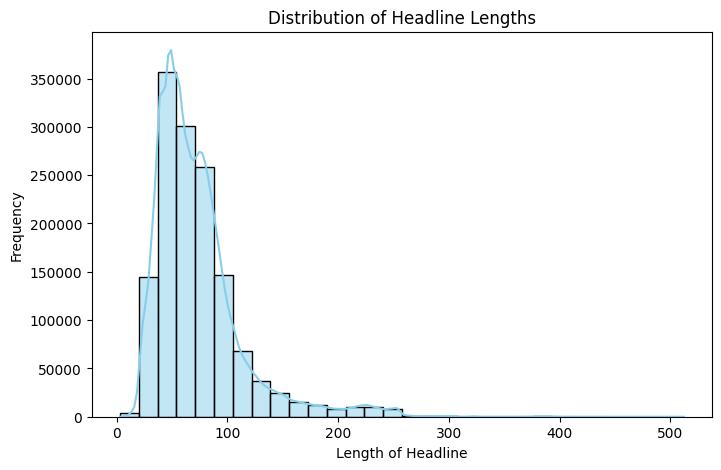

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


df['headline_length'] = df['headline'].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(df['headline_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Length of Headline')
plt.ylabel('Frequency')
plt.show()


## Topic Modeling and Keyword Extraction

/tmp/ipykernel_8470/3963880042.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='muted')


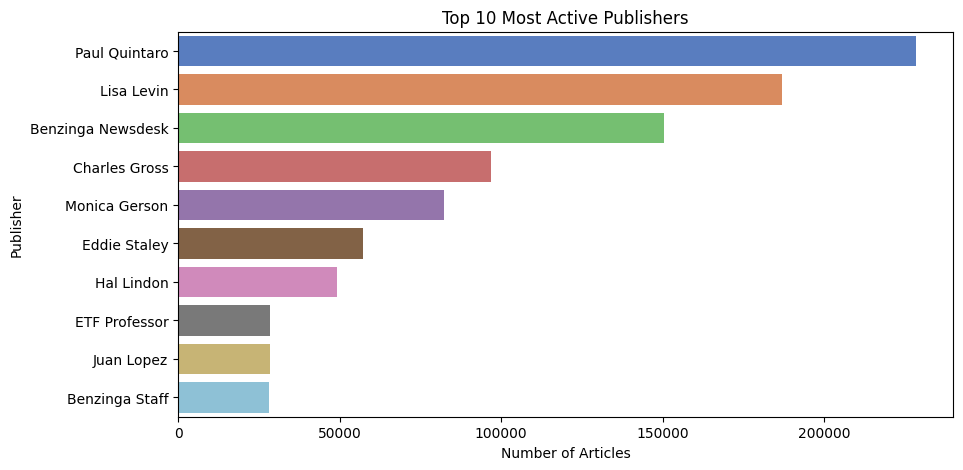

In [6]:
top_publishers = df['publisher'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='muted')
plt.title('Top 10 Most Active Publishers')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()


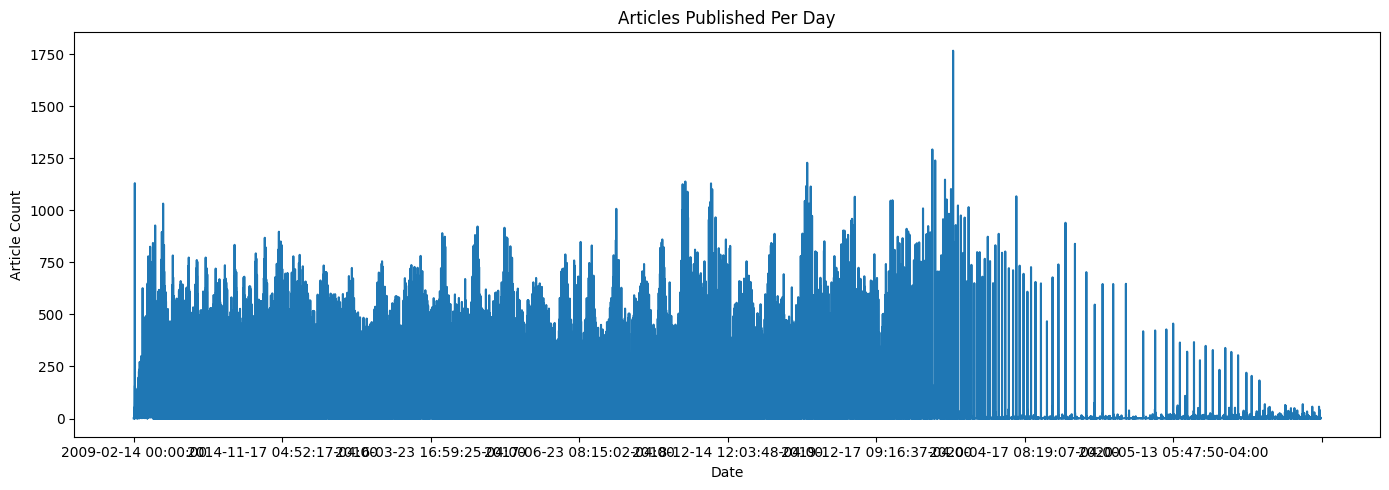

In [8]:
daily_counts = df.groupby('date').size()

plt.figure(figsize=(14, 5))
daily_counts.plot()
plt.title('Articles Published Per Day')
plt.xlabel('Date')
plt.ylabel('Article Count')
plt.tight_layout()
plt.show()


/tmp/ipykernel_8470/844973458.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=keywords, palette='viridis')


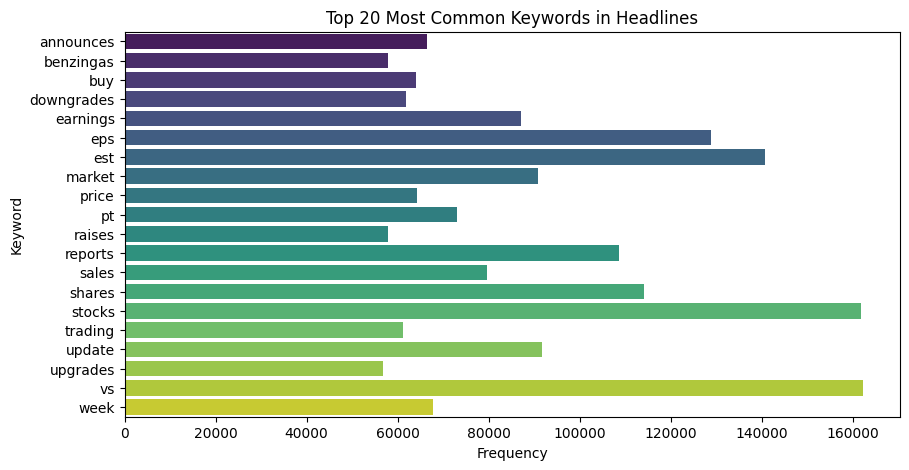

In [9]:
import re
from sklearn.feature_extraction.text import CountVectorizer

# Clean headlines
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['clean_headline'] = df['headline'].apply(clean_text)

# Vectorize and extract top words
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['clean_headline'])

keywords = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

plt.figure(figsize=(10, 5))
sns.barplot(x=counts, y=keywords, palette='viridis')
plt.title('Top 20 Most Common Keywords in Headlines')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()


In [10]:
%pip install scikit-learn


from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['headline'].fillna(''))
print(vectorizer.get_feature_names_out())


Note: you may need to restart the kernel to use updated packages.
['announces' 'benzinga' 'buy' 'downgrades' 'earnings' 'eps' 'est' 'market'
 'mid' 'price' 'pt' 'raises' 'reports' 'sales' 'shares' 'stocks' 'trading'
 'update' 'vs' 'week']
